# **Modelo Nicolas**

In [2]:
%pip install matplotlib seaborn imblearn lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import random
from imblearn.combine import SMOTEENN
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('base_traduzida_5.csv', sep=';')
df

,idade,evasao,genero_id,estado_civil_id,formacao_id,departamento_id,salario,cargo_id,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,porcentagem_ultimo_aumento,distancia_casa,quantidade_anos_atual_gestor,quantidade_anos_na_empresa,cpf,satisfacao_trabalho,viagem_trabalho_id,satisfacao_com_o_ambiente,envolvimento_no_trabalho,nivel_do_trabalho,satisfacao_com_relacionamento,quantidade_horas_treinamento_ano,equilibrio_trabalho_vida
0,41,Sim,2,2,5,6,5993,5,4,8,8,6,11,1,5,6,77627114367,4,3,2,3,2,1,0,1
1,49,Não,3,3,5,5,5130,6,7,1,10,4,23,8,7,10,10985367177,2,4,3,2,2,4,3,3
2,37,Sim,3,2,9,5,2090,7,0,6,7,6,15,2,0,0,38458610573,3,3,4,2,1,2,3,3
3,33,Não,2,3,5,5,2909,6,7,1,8,9,11,3,0,8,95259724396,3,4,4,3,1,3,3,3
4,27,Não,3,3,6,5,3468,7,2,9,6,4,12,2,2,2,75098503248,2,3,1,3,1,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Não,3,3,6,5,2571,7,2,4,17,6,17,23,3,5,17870074039,4,4,3,4,2,3,3,3
1466,39,Não,3,3,6,5,9991,9,7,4,9,4,15,6,7,7,1643457238,1,3,4,2,3,1,5,3
1467,27,Não,3,3,5,5,6142,8,2,1,6,8,20,4,3,6,64590857558,2,3,2,4,2,2,0,3
1468,49,Não,3,3,6,6,5390,5,6,2,17,8,14,2,8,9,880860641,2,4,4,2,2,4,3,2


In [3]:
df = pd.get_dummies(data=df, columns=['evasao','departamento_id','formacao_id','genero_id','cargo_id','estado_civil_id', 'viagem_trabalho_id'], drop_first=True)

# Rename columns name
df

,idade,salario,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,porcentagem_ultimo_aumento,distancia_casa,quantidade_anos_atual_gestor,quantidade_anos_na_empresa,cpf,satisfacao_trabalho,satisfacao_com_o_ambiente,envolvimento_no_trabalho,nivel_do_trabalho,satisfacao_com_relacionamento,quantidade_horas_treinamento_ano,equilibrio_trabalho_vida,evasao_Sim,departamento_id_5,departamento_id_6,formacao_id_6,formacao_id_7,formacao_id_8,formacao_id_9,formacao_id_10,genero_id_3,cargo_id_5,cargo_id_6,cargo_id_7,cargo_id_8,cargo_id_9,cargo_id_11,cargo_id_12,estado_civil_id_3,estado_civil_id_5,viagem_trabalho_id_3,viagem_trabalho_id_4
0,41,5993,4,8,8,6,11,1,5,6,77627114367,4,2,3,2,1,0,1,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,49,5130,7,1,10,4,23,8,7,10,10985367177,2,3,2,2,4,3,3,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True
2,37,2090,0,6,7,6,15,2,0,0,38458610573,3,4,2,1,2,3,3,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False
3,33,2909,7,1,8,9,11,3,0,8,95259724396,3,4,3,1,3,3,3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,27,3468,2,9,6,4,12,2,2,2,75098503248,2,1,3,1,4,3,3,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2571,2,4,17,6,17,23,3,5,17870074039,4,3,4,2,3,3,3,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True
1466,39,9991,7,4,9,4,15,6,7,7,1643457238,1,4,2,3,1,5,3,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False
1467,27,6142,2,1,6,8,20,4,3,6,64590857558,2,2,4,2,2,0,3,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False
1468,49,5390,6,2,17,8,14,2,8,9,880860641,2,4,2,2,4,3,2,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True


In [4]:
rename_dummies_columns = {'evasao_Sim': 'evasao', 'genero_id_3': 'genero'}

df.rename(columns=rename_dummies_columns, inplace=True)

In [13]:
df_train_test = df.sample(frac= 0.95, random_state=42)
df_validate = df.drop(df_train_test.index)

df_train_test.reset_index(drop=True, inplace= True)
df_validate.reset_index(drop=True, inplace= True)

print('95% of data for modeling:', df_train_test.shape)
print('05% of data for validate:', df_validate.shape)

95% of data for modeling: (1396, 38)
05% of data for validate: (74, 38)


In [6]:
df_train_test

,idade,salario,tempo_trabalho,quantidade_empresas_trabalhou,quantidade_anos_trabalhados_anteriormente,nivel_escolaridade_id,porcentagem_ultimo_aumento,distancia_casa,quantidade_anos_atual_gestor,quantidade_anos_na_empresa,cpf,satisfacao_trabalho,satisfacao_com_o_ambiente,envolvimento_no_trabalho,nivel_do_trabalho,satisfacao_com_relacionamento,quantidade_horas_treinamento_ano,equilibrio_trabalho_vida,evasao,departamento_id_5,departamento_id_6,formacao_id_6,formacao_id_7,formacao_id_8,formacao_id_9,formacao_id_10,genero,cargo_id_5,cargo_id_6,cargo_id_7,cargo_id_8,cargo_id_9,cargo_id_11,cargo_id_12,estado_civil_id_3,estado_civil_id_5,viagem_trabalho_id_3,viagem_trabalho_id_4
0,28,8463,4,0,6,8,18,5,3,5,16716254591,1,4,3,2,4,4,3,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
1,53,4450,2,1,5,6,11,13,3,4,77428841777,1,4,4,2,3,3,3,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
2,24,1555,0,1,1,4,11,22,0,1,24171591354,3,4,1,1,3,2,3,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False
3,45,9724,0,2,25,8,17,7,0,1,57801232330,1,2,3,3,3,2,3,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False
4,36,5914,11,8,16,6,16,5,7,13,23423202559,2,4,3,2,4,3,4,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,36,3210,13,0,16,8,11,6,11,15,56524702588,4,4,3,1,3,4,3,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False
1392,43,4081,7,1,20,8,14,6,8,20,45738146912,3,1,2,2,1,3,1,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1393,49,6804,7,1,7,9,15,18,7,7,7169263295,4,4,3,2,1,0,3,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
1394,27,2024,2,6,6,8,18,9,2,2,91892318433,2,4,3,1,4,1,1,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [7]:
df_train_test

df_train_test = df_train_test[df_train_test['salario'] == 5130]

In [14]:
X = df_train_test.drop(columns=df_train_test[['cpf', 'evasao']])
y = df_train_test['evasao']

In [15]:
y.shape

(1396,)

In [16]:
X.shape

(1396, 36)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1116, 36)
(1116,)
(280, 36)
(280,)


In [18]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)

In [20]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

[[-0.17854478 -0.00860956 -0.3835456  ... -0.37643114  0.90086801
  -0.40852974]
 [ 0.03570896 -0.17369131 -0.3835456  ... -0.37643114  0.90086801
  -0.40852974]
 [-0.28567165 -0.26525117  0.20057605 ... -0.37643114  0.90086801
  -0.40852974]
 ...
 [ 2.49962693  3.2740741   1.36881936 ... -0.37643114  0.90086801
  -0.40852974]
 [ 0.46421643 -0.28625743  1.07675853 ... -0.37643114  0.90086801
  -0.40852974]
 [-1.57119407 -0.63057731 -0.96766726 ... -0.37643114  0.90086801
  -0.40852974]]


In [21]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVC', SVC(probability=True)),  # SVC não usa random_state diretamente
    ('Naive Bayes', GaussianNB()),  # GaussianNB não usa random_state diretamente
    ('K-Nearest Neighbors', KNeighborsClassifier()),  # KNN não usa random_state diretamente
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('LGBM', LGBMClassifier(random_state=42, verbose=-1)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define cross-validation metrics
cross_val_metrics = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

# List to store results
results = []

# Dictionary to store best estimators
best_estimators = {}

# Define StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the models
for name, model in models:
    # Define the pipeline
    pipeline = imbpipeline(steps=[
        ['nearmiss', NearMiss()],
        ['scaler', StandardScaler()],
        ['classifier', model]
    ])

    # Define the parameter grid specific to each model
    if name == 'Logistic Regression':
        param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10],
                      'classifier__max_iter': [100, 300, 500],
                      'classifier__penalty': ['l1', 'l2'],
                      'classifier__solver': ['liblinear', 'saga']}
    elif name == 'SVC':
        param_grid = {'classifier__C': [0.01, 0.1, 1, 10],
                      'classifier__kernel': ['linear', 'rbf'],
                      'classifier__gamma': [1e-3, 1e-4, 'scale', 'auto']}
    elif name == 'K-Nearest Neighbors':
        param_grid = {'classifier__n_neighbors': [3, 5, 7],
                      'classifier__weights': ['uniform', 'distance']}
    elif name == 'Decision Tree':
        param_grid = {'classifier__max_depth': [None, 5, 10],
                      'classifier__min_samples_split': [2, 5, 10]}
    if name == 'Random Forest':
        param_grid = {'classifier__n_estimators': [50, 100, 150, 200, 300],
                      'classifier__max_depth': [None, 10, 20, 30, 50],
                      'classifier__min_samples_split': [2, 5, 10, 15],
                      'classifier__min_samples_leaf': [1, 2, 4, 6],
                      'classifier__max_features': ['auto', 'sqrt', 'log2', 0.5, 0.75],
                      'classifier__bootstrap': [True, False],
                      'classifier__class_weight': [None, 'balanced']}
    elif name == 'Gradient Boosting':
        param_grid = {'classifier__n_estimators': [100, 200],
                      'classifier__learning_rate': [0.01, 0.1],
                      'classifier__max_depth': [3, 5],
                      'classifier__subsample': [0.8, 1.0]}
    elif name == 'LGBM':
        param_grid = {'classifier__n_estimators': [100, 200],
                      'classifier__learning_rate': [0.01, 0.1],
                      'classifier__max_depth': [3, 5],
                      'classifier__num_leaves': [31, 63, 127]}
    elif name == 'XGBoost':
        param_grid = {'classifier__n_estimators': [100, 200],
                      'classifier__learning_rate': [0.01, 0.1],
                      'classifier__max_depth': [3, 5],
                      'classifier__subsample': [0.8, 1.0]}
    else:
        param_grid = {}

    # Create the GridSearchCV with refit on 'recall'
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring=cross_val_metrics,
                               refit='recall',
                               cv=stratified_kfold,
                               n_jobs=-1)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train_scaled, y_resampled)

    # Save the best estimator for the current model
    best_estimators[name] = grid_search.best_estimator_['classifier']

    # Evaluate the best model on the test set for all metrics
    y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]

    # Define a new threshold
    new_threshold = 0.4  # Ajuste o threshold para o valor desejado

    # Apply the threshold to get new predictions
    y_pred = (y_pred_proba >= new_threshold).astype(int)

    test_scores = {
        'accuracy': round(accuracy_score(y_test, y_pred), 3),
        'precision': round(precision_score(y_test, y_pred), 3),
        'recall': round(recall_score(y_test, y_pred), 3),
        'f1': round(f1_score(y_test, y_pred), 3),
        'roc_auc': round(roc_auc_score(y_test, y_pred_proba), 3)
    }

    # Add results to the DataFrame
    results.append({
        'model': name,
        **test_scores
    })


  File "d:\Projetos\CasaInteligente-Back\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [22]:
df_model_comparison = pd.DataFrame(results)

df_model_comparison

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.764,0.347,0.568,0.431,0.708
1,SVC,0.793,0.365,0.432,0.396,0.677
2,Naive Bayes,0.325,0.166,0.818,0.276,0.557
3,K-Nearest Neighbors,0.611,0.227,0.614,0.331,0.642
4,Decision Tree,0.696,0.259,0.500,0.341,0.617
5,Random Forest,0.686,0.271,0.591,0.371,0.669
6,Gradient Boosting,0.743,0.306,0.500,0.379,0.666
7,LGBM,0.764,0.328,0.477,0.389,0.711
8,XGBoost,0.768,0.338,0.500,0.404,0.704


In [23]:
best_model = best_estimators['Logistic Regression']

In [24]:
final_pipeline = imbpipeline(steps=[
                            ['nearmiss', NearMiss()],
                            ['scaler', StandardScaler()],
                            ['classifier', best_model]
                    ])

final_pipeline.fit(X_train_scaled, y_resampled)
y_pred = final_pipeline.predict(X_test_scaled)
y_pred_proba = final_pipeline.predict_proba(X_test_scaled)[:, 1]

In [63]:
import pickle

with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(final_pipeline, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('columns.pkl', 'wb') as columns_file:
    pickle.dump(X.columns, columns_file)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.86      0.88       236
        True       0.40      0.52      0.46        44

    accuracy                           0.80       280
   macro avg       0.65      0.69      0.67       280
weighted avg       0.83      0.80      0.81       280



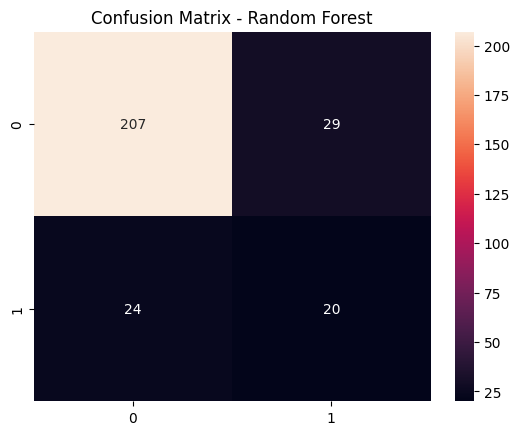

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title('Confusion Matrix - Random Forest');

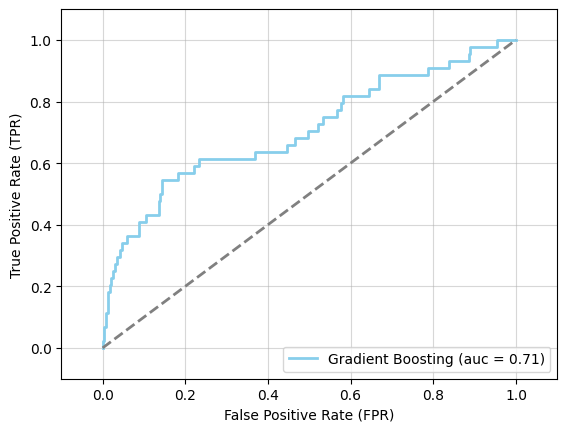

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'Gradient Boosting (auc = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

In [26]:
feature_scores = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(8, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, palette='crest_r')
ax.set_title("Feature Importance - Gradient Boosting")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [51]:
feature_scores.head(5)

NameError: name 'feature_scores' is not defined